In [1]:
import pandas as pd
import numpy as np

In [2]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score
from keras.layers import Dense
import tensorflow.keras as keras
from keras.models import Sequential
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd, numpy as np, os, xgboost as xgb, matplotlib.pyplot as plt, seaborn as sns

In [3]:
import pandas as pd
import numpy as np
sample_train_data = pd.read_csv('sample_train_data.csv')
df = pd.read_csv('sample_train_data.csv')
print(df.head())

print("Data Frame shape: ", df.shape)

df.info()

                                         customer_ID  target         S_2  \
0  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-03-21   
1  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-04-21   
2  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-05-08   
3  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-06-14   
4  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-07-26   

        P_2      D_39       B_1       B_2       R_1       S_3      D_41  ...  \
0  0.628534  0.004250  0.017667  0.815468  0.005736  0.265531  0.005933  ...   
1  0.669914  0.418321  0.354284  1.000587  0.009774  0.176196  0.007370  ...   
2  0.661933  0.003989  0.244867  1.008683  0.005743  0.169471  0.005953  ...   
3  0.644270  0.009351  0.017799  0.668398  0.003148  0.174020  0.006656  ...   
4  0.688055  0.002832  0.009458  0.779692  0.000870  0.174547  0.009100  ...   

   D_136  D_137  D_138     D_139     D_140     D_141  D_142   

In [4]:
print(df.shape)
print(df.columns)

(11088, 191)
Index(['customer_ID', 'target', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1',
       'S_3', 'D_41',
       ...
       'D_136', 'D_137', 'D_138', 'D_139', 'D_140', 'D_141', 'D_142', 'D_143',
       'D_144', 'D_145'],
      dtype='object', length=191)


In [5]:
df

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-03-21,0.628534,0.004250,0.017667,0.815468,0.005736,0.265531,0.005933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-04-21,0.669914,0.418321,0.354284,1.000587,0.009774,0.176196,0.007370,...,NaN,NaN,NaN,0.003869,0.008332,0.005805,NaN,0.006603,0.007874,0.002185
2,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-05-08,0.661933,0.003989,0.244867,1.008683,0.005743,0.169471,0.005953,...,NaN,NaN,NaN,0.004872,0.008471,0.006763,NaN,0.009782,0.007285,0.000121
3,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-06-14,0.644270,0.009351,0.017799,0.668398,0.003148,0.174020,0.006656,...,NaN,NaN,NaN,0.009246,0.009905,0.008673,NaN,0.003927,0.001159,0.000433
4,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-07-26,0.688055,0.002832,0.009458,0.779692,0.000870,0.174547,0.009100,...,NaN,NaN,NaN,0.004311,0.006488,0.004953,NaN,0.009283,0.003769,0.006124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11083,7c34cee24db4f5b4111876e1da4f173b3be5e2be7ee129...,1,2017-11-09,0.587602,0.061582,0.052301,0.814591,0.009383,0.177935,0.008739,...,0.502413,0.005323,0.002621,0.000473,0.006220,0.009538,NaN,0.000143,0.004029,0.008049
11084,7c34cee24db4f5b4111876e1da4f173b3be5e2be7ee129...,1,2017-12-09,0.564856,0.033197,0.039112,0.374204,0.001327,0.174978,0.009402,...,0.508781,0.008572,0.003757,0.008467,0.003893,0.003550,NaN,0.007642,0.007171,0.007557
11085,7c34cee24db4f5b4111876e1da4f173b3be5e2be7ee129...,1,2018-01-09,0.645380,0.001814,0.004088,0.371904,0.002079,0.173956,0.004303,...,0.505880,0.006104,0.008582,0.000162,0.006500,0.003719,NaN,0.001048,0.006001,0.001535
11086,7c34cee24db4f5b4111876e1da4f173b3be5e2be7ee129...,1,2018-02-06,0.539487,0.001452,0.000365,0.814080,0.000989,0.174810,0.009362,...,0.503051,0.002612,0.001443,0.000022,0.009622,0.007225,NaN,0.003724,0.003936,0.006554


In [6]:
# Coverting the S_2 to datatime object
df['S_2'] = pd.to_datetime(df['S_2'])

In [7]:
all_cols = [c for c in list(df.columns) if c not in ['customer_ID','S_2']]

# There are 11 cat_features
cat_features = ["B_30","B_38","D_114","D_116","D_117","D_120","D_126","D_63","D_64","D_66","D_68"]

#There are 180 num_features
num_features = [col for col in all_cols if col not in cat_features]

In [8]:
print("B -- ", len([i for i in df.columns if i.startswith("B")]))
print("D -- ", len([i for i in df.columns if i.startswith("D")]))
print("P -- ", len([i for i in df.columns if i.startswith("P")]))
print("R -- ", len([i for i in df.columns if i.startswith("R")]))
print("S -- ", len([i for i in df.columns if i.startswith("S")]))

B --  40
D --  96
P --  3
R --  28
S --  22


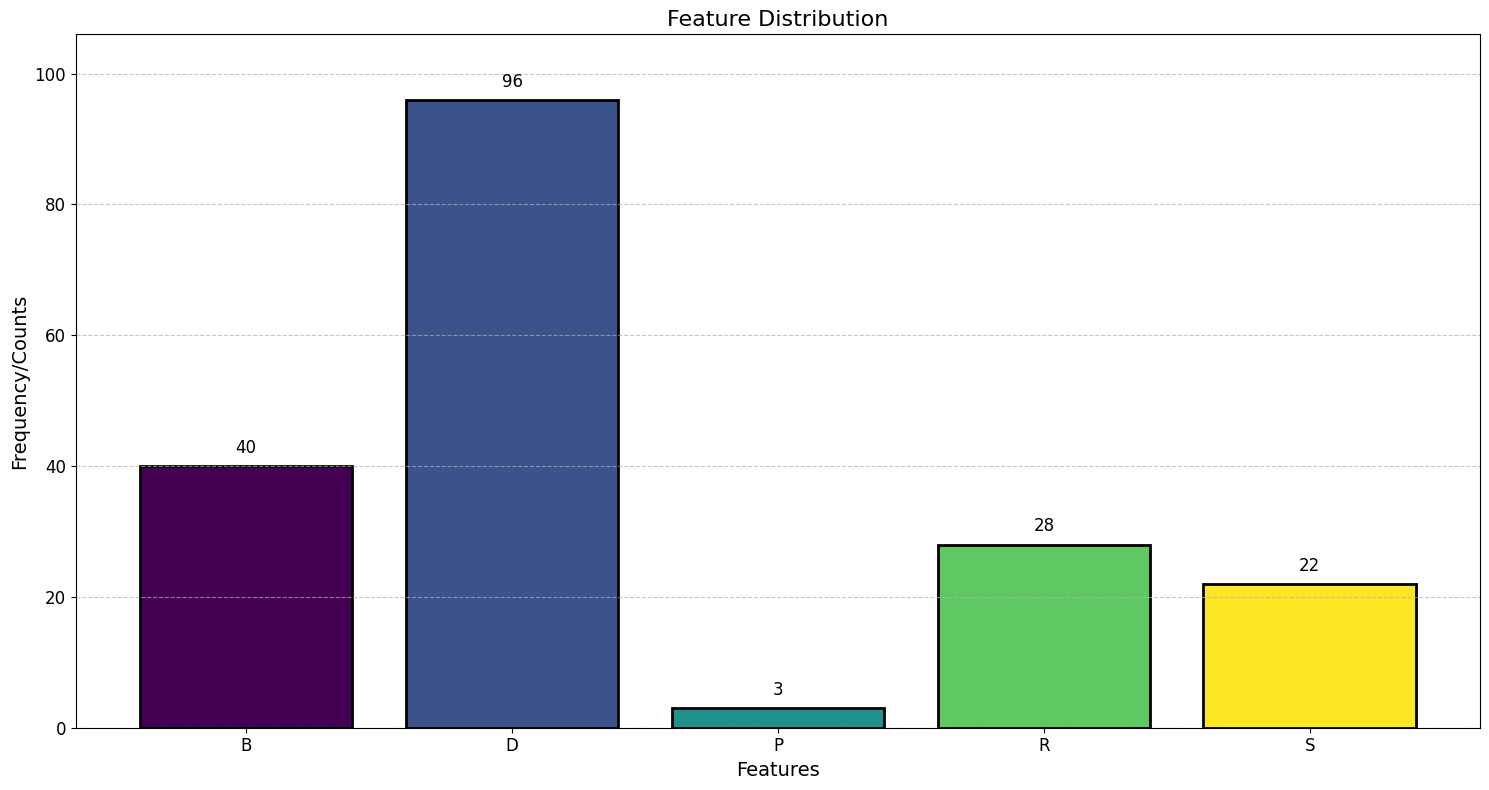

In [9]:
import pandas as pd, numpy as np, os, xgboost as xgb, matplotlib.pyplot as plt, seaborn as sns
# From above output
categories = ['B', 'D', 'P', 'R', 'S']
cat_count_values = [40, 96, 3, 28, 22]
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(categories)))
plt.figure(figsize=(15, 8)) 
plt.bar(categories, cat_count_values, color=colors, edgecolor='black', linewidth=2)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Frequency/Counts', fontsize=14)
plt.title('Feature Distribution', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, v in enumerate(cat_count_values):
    plt.text(i, v + 2, str(v), ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(cat_count_values) + 10)
plt.tight_layout()
plt.show()

In [10]:
df_encoded = pd.get_dummies(df, columns=cat_features, prefix=cat_features, dtype='int')
print(df_encoded.shape)
df_encoded.to_csv('encoded_data.csv', index=False)
df2 = pd.read_csv('encoded_data.csv')
df2.head()

(11088, 225)


,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-03-21,0.628534,0.004250,0.017667,0.815468,0.005736,0.265531,0.005933,...,0,0,0,0,0,0,0,0,0,0
1,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-04-21,0.669914,0.418321,0.354284,1.000587,0.009774,0.176196,0.007370,...,0,0,0,0,0,0,0,0,0,0
2,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-05-08,0.661933,0.003989,0.244867,1.008683,0.005743,0.169471,0.005953,...,0,0,0,0,0,1,0,0,0,0
3,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-06-14,0.644270,0.009351,0.017799,0.668398,0.003148,0.174020,0.006656,...,0,0,0,0,0,1,0,0,0,0
4,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-07-26,0.688055,0.002832,0.009458,0.779692,0.000870,0.174547,0.009100,...,0,0,0,0,0,1,0,0,0,0


In [11]:
df2.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-03-21,0.628534,0.004250,0.017667,0.815468,0.005736,0.265531,0.005933,...,0,0,0,0,0,0,0,0,0,0
1,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-04-21,0.669914,0.418321,0.354284,1.000587,0.009774,0.176196,0.007370,...,0,0,0,0,0,0,0,0,0,0
2,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-05-08,0.661933,0.003989,0.244867,1.008683,0.005743,0.169471,0.005953,...,0,0,0,0,0,1,0,0,0,0
3,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-06-14,0.644270,0.009351,0.017799,0.668398,0.003148,0.174020,0.006656,...,0,0,0,0,0,1,0,0,0,0
4,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-07-26,0.688055,0.002832,0.009458,0.779692,0.000870,0.174547,0.009100,...,0,0,0,0,0,1,0,0,0,0


In [12]:
print(df2.columns)
print(df2.shape)

Index(['customer_ID', 'target', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1',
       'S_3', 'D_41',
       ...
       'D_64_U', 'D_66_0.0', 'D_66_1.0', 'D_68_0.0', 'D_68_1.0', 'D_68_2.0',
       'D_68_3.0', 'D_68_4.0', 'D_68_5.0', 'D_68_6.0'],
      dtype='object', length=225)
(11088, 225)


In [13]:
def num_stats(df, months, numerical_features):
    # Convert 'S_2' column to datetime format
    df['S_2'] = pd.to_datetime(df['S_2'])
    
    last_date = df['S_2'].max()
    results = {}

    for month in months:
        time_month_ago = last_date - pd.DateOffset(months=month)
        data_last_time_month = df[(df['S_2'] > time_month_ago) & (df['S_2'] <= last_date)]
        average_spend_last_time_month = data_last_time_month.groupby('customer_ID')[numerical_features].agg(['mean', 'min', 'max', 'sum'])
        average_spend_last_time_month.columns = [f'{col}_{agg}_{month}' for col, agg in average_spend_last_time_month.columns]
        results[month] = average_spend_last_time_month

    return results

# Define your numerical_features
numerical_features = [col for col in num_features if col != 'target']

# Calculate statistics for different time periods
average_spend_3_months = num_stats(df2, [3], numerical_features)
average_spend_6_months = num_stats(df2, [6], numerical_features)
average_spend_9_months = num_stats(df2, [9], numerical_features)
average_spend_12_months = num_stats(df2, [12], numerical_features)

final_numerical_df = pd.merge(average_spend_3_months[3], average_spend_6_months[6], on='customer_ID', how='inner')
final_numerical_df = pd.merge(final_numerical_df, average_spend_9_months[9], on='customer_ID', how='inner')
final_numerical_df = pd.merge(final_numerical_df, average_spend_12_months[12], on='customer_ID', how='inner')

final_numerical_df.head()

,P_2_mean_3,P_2_min_3,P_2_max_3,P_2_sum_3,D_39_mean_3,D_39_min_3,D_39_max_3,D_39_sum_3,B_1_mean_3,B_1_min_3,...,D_143_max_12,D_143_sum_12,D_144_mean_12,D_144_min_12,D_144_max_12,D_144_sum_12,D_145_mean_12,D_145_min_12,D_145_max_12,D_145_sum_12
customer_ID,,,,,,,,,,,,,,,,,,,,,
000f8675ede66cc6affd4c048db11a00246d7ee623f453aae22d693c4a82f832,0.800614,0.799201,0.801820,2.401842,0.004725,0.002242,0.009306,0.014174,0.004958,0.004638,...,0.008815,0.057174,0.005756,0.000294,0.009770,0.069070,0.004229,0.000395,0.009581,0.050747
00562bc943163345c838cb0eaf50656c16af09b9991f60a98221bfe7e3512937,0.476908,0.476044,0.477811,1.430723,0.161256,0.007554,0.446407,0.483767,0.026542,0.011228,...,0.008099,0.057856,0.005463,0.000338,0.009566,0.065550,0.005355,0.000719,0.009728,0.064265
00d67847cec494e19fd3d03d670a207a1bceb5665d23812c6cf8d033a535392d,0.746740,0.743583,0.748853,2.240220,0.259179,0.004316,0.505425,0.777537,0.025788,0.019086,...,1.009967,5.061285,0.005333,0.001378,0.009426,0.063993,0.041198,0.000155,0.100302,0.494378
00def60d36bbb3f6a51dcf0e8a999ab2c383813ec7e8ca124a870eacdc37f620,0.575231,0.555171,0.598420,1.725694,0.201087,0.004838,0.533876,0.603262,0.335257,0.328402,...,1.008457,12.042613,0.004775,0.000275,0.008610,0.057300,0.185156,0.182056,0.190559,2.221872
0100f09517c1ba25f036d2b95310e2ac00c02871f583ae173aa0e8adc9046211,0.862373,0.843627,0.877327,2.587118,0.004059,0.002604,0.005954,0.012178,0.004100,0.001587,...,0.009768,0.060933,0.005457,0.002208,0.009586,0.065479,0.004668,0.000201,0.009697,0.056011


In [14]:
cat_new_features = ["B_30","B_38","D_114","D_116","D_117","D_120","D_126","D_66","D_68"]

In [15]:
def cat_stats(df, time_period, cat_new_features):
    last_date = df['S_2'].max()
    time_period_ago = last_date - pd.DateOffset(months=time_period)

    data_last_time_period = df[(df['S_2'] > time_period_ago) & (df['S_2'] <= last_date)]
    
    grouped_positive_response_rates = data_last_time_period.groupby('customer_ID')[cat_new_features].mean()
    grouped_positive_response_rates.columns = [f'{col}_response_rate_{time_period}' for col in grouped_positive_response_rates.columns]
    
    grouped_ever_responded = data_last_time_period.groupby('customer_ID')[cat_new_features].any().astype(int)
    grouped_ever_responded.columns = [f'{col}_ever_respond_{time_period}' for col in grouped_ever_responded.columns]
    
    merged_df = pd.merge(grouped_positive_response_rates,grouped_ever_responded, on='customer_ID', how='inner')
    
    return merged_df

cat_stats_3_months = cat_stats(df, 3, cat_new_features)
cat_stats_6_months = cat_stats(df, 6, cat_new_features)
cat_stats_9_months = cat_stats(df, 9, cat_new_features)
cat_stats_12_months = cat_stats(df, 12, cat_new_features)

final_categorical_df = pd.merge(cat_stats_3_months, cat_stats_6_months, on='customer_ID', how='inner')
final_categorical_df = pd.merge(final_categorical_df, cat_stats_9_months, on='customer_ID', how='inner')
final_categorical_df = pd.merge(final_categorical_df, cat_stats_12_months, on='customer_ID', how='inner')

final_categorical_df.head()

,B_30_response_rate_3,B_38_response_rate_3,D_114_response_rate_3,D_116_response_rate_3,D_117_response_rate_3,D_120_response_rate_3,D_126_response_rate_3,D_66_response_rate_3,D_68_response_rate_3,B_30_ever_respond_3,...,D_68_response_rate_12,B_30_ever_respond_12,B_38_ever_respond_12,D_114_ever_respond_12,D_116_ever_respond_12,D_117_ever_respond_12,D_120_ever_respond_12,D_126_ever_respond_12,D_66_ever_respond_12,D_68_ever_respond_12
customer_ID,,,,,,,,,,,,,,,,,,,,,
000f8675ede66cc6affd4c048db11a00246d7ee623f453aae22d693c4a82f832,0.0,1.0,1.0,0.0,3.0,0.000000,1.0,NaN,5.0,0,...,5.000000,0,1,1,0,1,0,1,0,1
00562bc943163345c838cb0eaf50656c16af09b9991f60a98221bfe7e3512937,0.0,3.0,1.0,0.0,-1.0,0.000000,1.0,NaN,5.0,0,...,5.000000,0,1,1,0,1,0,1,0,1
00d67847cec494e19fd3d03d670a207a1bceb5665d23812c6cf8d033a535392d,0.0,2.0,0.0,0.0,5.0,0.000000,0.0,NaN,3.0,0,...,2.916667,0,1,0,0,1,0,0,0,1
00def60d36bbb3f6a51dcf0e8a999ab2c383813ec7e8ca124a870eacdc37f620,1.0,4.0,1.0,0.0,2.0,0.666667,1.0,NaN,6.0,1,...,5.750000,1,1,1,0,1,1,1,0,1
0100f09517c1ba25f036d2b95310e2ac00c02871f583ae173aa0e8adc9046211,0.0,1.0,1.0,0.0,6.0,0.000000,1.0,NaN,6.0,0,...,6.000000,0,1,1,0,1,0,1,0,1


In [16]:
final_data = pd.merge(final_numerical_df, final_categorical_df, on='customer_ID', how='inner')
df2 = pd.merge(df2, final_data, on='customer_ID', how='inner')

df2.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_68_response_rate_12,B_30_ever_respond_12,B_38_ever_respond_12,D_114_ever_respond_12,D_116_ever_respond_12,D_117_ever_respond_12,D_120_ever_respond_12,D_126_ever_respond_12,D_66_ever_respond_12,D_68_ever_respond_12
0,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-03-21,0.628534,0.004250,0.017667,0.815468,0.005736,0.265531,0.005933,...,2.181818,0,1,0,0,1,0,1,0,1
1,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-04-21,0.669914,0.418321,0.354284,1.000587,0.009774,0.176196,0.007370,...,2.181818,0,1,0,0,1,0,1,0,1
2,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-05-08,0.661933,0.003989,0.244867,1.008683,0.005743,0.169471,0.005953,...,2.181818,0,1,0,0,1,0,1,0,1
3,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-06-14,0.644270,0.009351,0.017799,0.668398,0.003148,0.174020,0.006656,...,2.181818,0,1,0,0,1,0,1,0,1
4,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-07-26,0.688055,0.002832,0.009458,0.779692,0.000870,0.174547,0.009100,...,2.181818,0,1,0,0,1,0,1,0,1


In [17]:
df2.head

<bound method NDFrame.head of                                              customer_ID  target        S_2  \
0      12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0 2017-03-21   
1      12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0 2017-04-21   
2      12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0 2017-05-08   
3      12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0 2017-06-14   
4      12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0 2017-07-26   
...                                                  ...     ...        ...   
11083  7c34cee24db4f5b4111876e1da4f173b3be5e2be7ee129...       1 2017-11-09   
11084  7c34cee24db4f5b4111876e1da4f173b3be5e2be7ee129...       1 2017-12-09   
11085  7c34cee24db4f5b4111876e1da4f173b3be5e2be7ee129...       1 2018-01-09   
11086  7c34cee24db4f5b4111876e1da4f173b3be5e2be7ee129...       1 2018-02-06   
11087  7c34cee24db4f5b4111876e1da4f173b3be5e2be7ee129...       1 2018-03-09   

            P_2      

In [18]:
from sklearn.model_selection import train_test_split
# 70% train set and a 30% test set
train_set, test_set = train_test_split(df2, test_size=0.3, random_state=42)

# Split test set into a 15% test1 set and a 15% test2 set
test1_set, test2_set = train_test_split(test_set, test_size=0.5, random_state=42)


#resulting sets
print("Train set shape:", train_set.shape)
print("Test1 set shape:", test1_set.shape)
print("Test2 set shape:", test2_set.shape)

Train set shape: (7761, 3129)
Test1 set shape: (1663, 3129)
Test2 set shape: (1664, 3129)


In [19]:
df2.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_68_response_rate_12,B_30_ever_respond_12,B_38_ever_respond_12,D_114_ever_respond_12,D_116_ever_respond_12,D_117_ever_respond_12,D_120_ever_respond_12,D_126_ever_respond_12,D_66_ever_respond_12,D_68_ever_respond_12
0,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-03-21,0.628534,0.004250,0.017667,0.815468,0.005736,0.265531,0.005933,...,2.181818,0,1,0,0,1,0,1,0,1
1,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-04-21,0.669914,0.418321,0.354284,1.000587,0.009774,0.176196,0.007370,...,2.181818,0,1,0,0,1,0,1,0,1
2,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-05-08,0.661933,0.003989,0.244867,1.008683,0.005743,0.169471,0.005953,...,2.181818,0,1,0,0,1,0,1,0,1
3,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-06-14,0.644270,0.009351,0.017799,0.668398,0.003148,0.174020,0.006656,...,2.181818,0,1,0,0,1,0,1,0,1
4,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-07-26,0.688055,0.002832,0.009458,0.779692,0.000870,0.174547,0.009100,...,2.181818,0,1,0,0,1,0,1,0,1


In [20]:
corr_df = df2.copy()

In [21]:
df2.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_68_response_rate_12,B_30_ever_respond_12,B_38_ever_respond_12,D_114_ever_respond_12,D_116_ever_respond_12,D_117_ever_respond_12,D_120_ever_respond_12,D_126_ever_respond_12,D_66_ever_respond_12,D_68_ever_respond_12
0,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-03-21,0.628534,0.004250,0.017667,0.815468,0.005736,0.265531,0.005933,...,2.181818,0,1,0,0,1,0,1,0,1
1,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-04-21,0.669914,0.418321,0.354284,1.000587,0.009774,0.176196,0.007370,...,2.181818,0,1,0,0,1,0,1,0,1
2,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-05-08,0.661933,0.003989,0.244867,1.008683,0.005743,0.169471,0.005953,...,2.181818,0,1,0,0,1,0,1,0,1
3,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-06-14,0.644270,0.009351,0.017799,0.668398,0.003148,0.174020,0.006656,...,2.181818,0,1,0,0,1,0,1,0,1
4,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-07-26,0.688055,0.002832,0.009458,0.779692,0.000870,0.174547,0.009100,...,2.181818,0,1,0,0,1,0,1,0,1


In [22]:
corr_df.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_68_response_rate_12,B_30_ever_respond_12,B_38_ever_respond_12,D_114_ever_respond_12,D_116_ever_respond_12,D_117_ever_respond_12,D_120_ever_respond_12,D_126_ever_respond_12,D_66_ever_respond_12,D_68_ever_respond_12
0,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-03-21,0.628534,0.004250,0.017667,0.815468,0.005736,0.265531,0.005933,...,2.181818,0,1,0,0,1,0,1,0,1
1,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-04-21,0.669914,0.418321,0.354284,1.000587,0.009774,0.176196,0.007370,...,2.181818,0,1,0,0,1,0,1,0,1
2,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-05-08,0.661933,0.003989,0.244867,1.008683,0.005743,0.169471,0.005953,...,2.181818,0,1,0,0,1,0,1,0,1
3,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-06-14,0.644270,0.009351,0.017799,0.668398,0.003148,0.174020,0.006656,...,2.181818,0,1,0,0,1,0,1,0,1
4,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-07-26,0.688055,0.002832,0.009458,0.779692,0.000870,0.174547,0.009100,...,2.181818,0,1,0,0,1,0,1,0,1


In [24]:
corr_df.drop(["customer_ID", "S_2"], axis = 1, inplace = True)

In [25]:
corr_df.corr()

,target,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_68_response_rate_12,B_30_ever_respond_12,B_38_ever_respond_12,D_114_ever_respond_12,D_116_ever_respond_12,D_117_ever_respond_12,D_120_ever_respond_12,D_126_ever_respond_12,D_66_ever_respond_12,D_68_ever_respond_12
target,1.000000,-0.595985,0.187916,0.372421,-0.474145,0.354653,0.342278,0.242169,0.423896,0.482081,...,-0.173356,0.498976,NaN,-0.208488,0.066940,-0.012863,0.232821,-0.110381,-0.053881,-0.012863
P_2,-0.595985,1.000000,-0.208294,-0.378220,0.566024,-0.433907,-0.316675,-0.316762,-0.467859,-0.535633,...,0.286910,-0.516402,NaN,0.281802,-0.056441,0.020046,-0.297438,0.198897,0.022714,0.020046
D_39,0.187916,-0.208294,1.000000,0.201548,-0.204582,0.199514,0.077251,0.468206,0.185971,0.132655,...,-0.022157,0.137131,NaN,-0.031454,0.001356,0.004800,0.019899,-0.018770,0.016804,0.004800
B_1,0.372421,-0.378220,0.201548,1.000000,-0.635080,0.217218,0.098740,0.185345,0.771979,0.009772,...,-0.051071,0.637908,NaN,-0.074249,-0.005286,-0.010475,0.090879,-0.035437,-0.071599,-0.010475
B_2,-0.474145,0.566024,-0.204582,-0.635080,1.000000,-0.304870,-0.224402,-0.246358,-0.708751,-0.307228,...,0.113083,-0.691626,NaN,0.163543,-0.033820,-0.013554,-0.130584,0.059985,0.069092,-0.013554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D_117_ever_respond_12,-0.012863,0.020046,0.004800,-0.010475,-0.013554,0.005693,-0.008238,0.009130,0.011014,-0.029759,...,NaN,0.006982,NaN,0.052984,0.002344,1.000000,0.019116,0.107081,0.014243,1.000000
D_120_ever_respond_12,0.232821,-0.297438,0.019899,0.090879,-0.130584,0.139242,0.130133,0.059615,0.075644,0.156775,...,-0.202841,0.153603,NaN,-0.115026,0.027517,0.019116,1.000000,-0.158590,-0.018815,0.019116
D_126_ever_respond_12,-0.110381,0.198897,-0.018770,-0.035437,0.059985,-0.021667,-0.102971,-0.014771,-0.037415,-0.083488,...,0.336372,-0.041448,NaN,0.272550,0.021891,0.107081,-0.158590,1.000000,0.067715,0.107081
D_66_ever_respond_12,-0.053881,0.022714,0.016804,-0.071599,0.069092,-0.015114,-0.058821,0.006692,-0.073018,-0.031865,...,-0.075238,-0.052683,NaN,-0.023840,0.034986,0.014243,-0.018815,0.067715,1.000000,0.014243


<Axes: >

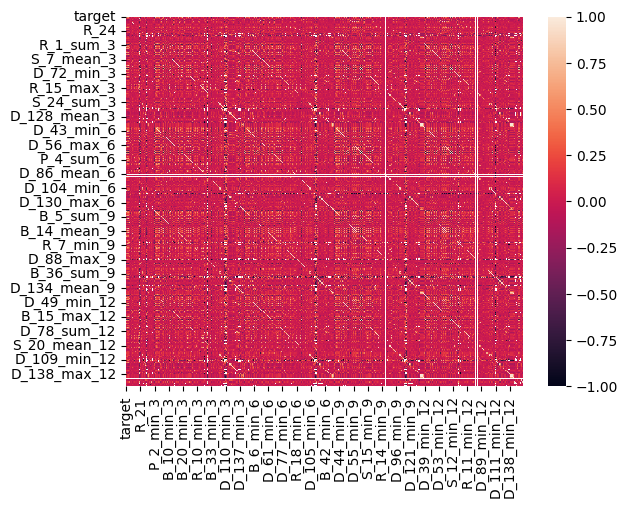

In [26]:
import seaborn as sns
sns.heatmap(corr_df.corr())

In [27]:
correlation_matrix = corr_df.corr()
mask = (correlation_matrix > 0.7) | (correlation_matrix < -0.7)  # mask for values > 0.7 or < -0.7
high_correlation_features = correlation_matrix[mask].stack().reset_index()
high_correlation_features.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_correlation_features = high_correlation_features[high_correlation_features['Feature 1'] != high_correlation_features['Feature 2']]
high_correlation_features.sort_values(['Correlation'], ascending=False)

,Feature 1,Feature 2,Correlation
4429,D_111,D_134,1.0
5348,D_134,D_111,1.0
5347,D_134,D_110,1.0
4100,D_110,D_134,1.0
35430,D_111_max_3,D_132_min_3,1.0
...,...,...,...
35031,D_111_min_3,D_132_max_3,-1.0
38881,D_132_mean_3,D_111_min_3,-1.0
38979,D_132_min_3,D_111_min_3,-1.0
35030,D_111_min_3,D_132_min_3,-1.0


In [28]:
!pip install xgboost

In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
# Split data into features (X) and target (y)
X = train_set.drop(columns=['target','S_2','customer_ID'])
y = train_set['target']

In [30]:
X.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_68_response_rate_12,B_30_ever_respond_12,B_38_ever_respond_12,D_114_ever_respond_12,D_116_ever_respond_12,D_117_ever_respond_12,D_120_ever_respond_12,D_126_ever_respond_12,D_66_ever_respond_12,D_68_ever_respond_12
6671,0.433479,0.391251,0.216731,0.107012,0.506409,0.225209,0.001609,0.156107,0.043956,0.345472,...,6.000000,0,1,1,0,1,1,1,0,1
10460,0.525321,0.037567,0.177709,0.039942,0.002722,NaN,0.003550,0.275864,NaN,0.112744,...,6.000000,1,1,0,0,1,0,1,0,1
8665,0.475596,0.006295,0.003475,0.818520,0.008960,NaN,0.007075,0.002590,0.306899,NaN,...,5.000000,0,1,1,0,1,1,1,1,1
5695,0.888534,0.120954,0.044278,1.007784,0.006318,0.142432,0.009021,0.005380,NaN,0.038763,...,5.916667,0,1,1,0,1,1,0,1,1
601,0.468423,0.036052,0.417681,0.028088,0.008736,0.314061,0.006048,0.749676,NaN,0.154668,...,6.000000,1,1,0,0,1,0,1,0,1


In [31]:
y.head()

6671     1
10460    1
8665     0
5695     0
601      1
Name: target, dtype: int64

In [32]:
y.head()

6671     1
10460    1
8665     0
5695     0
601      1
Name: target, dtype: int64

In [33]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# XGBClassifier object
xg_clf = xgb.XGBClassifier(use_label_encoder=False)

# Fit the classifier to the training data
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

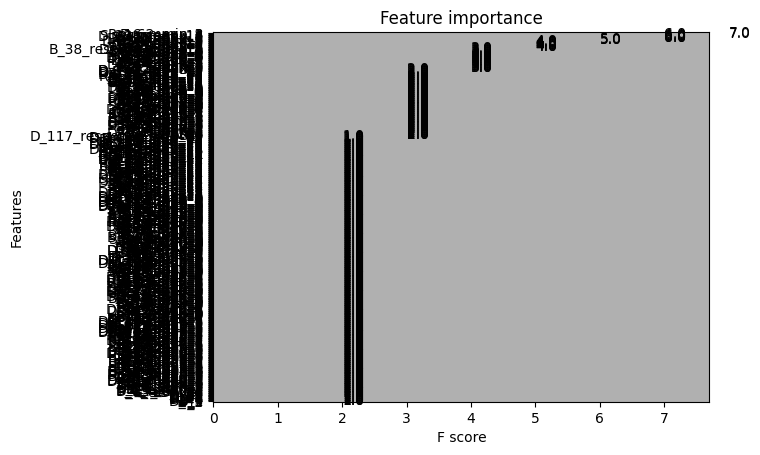

In [34]:
xgb.plot_importance(xg_clf.fit(X_train, y_train), importance_type='weight')

In [35]:
feature_importances = xg_clf.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

features_df.to_csv('feature_importances.csv', index=False)
print (features_df.to_string())

                     Feature  Importance
0                        P_2    0.002294
1                       D_39    0.000000
2                        B_1    0.000238
3                        B_2    0.000000
4                        R_1    0.000000
5                        S_3    0.000000
6                       D_41    0.000000
7                        B_3    0.000491
8                       D_42    0.000000
9                       D_43    0.000524
10                      D_44    0.000000
11                       B_4    0.000785
12                      D_45    0.000377
13                       B_5    0.000121
14                       R_2    0.000000
15                      D_46    0.000037
16                      D_47    0.000000
17                      D_48    0.000299
18                      D_49    0.000000
19                       B_6    0.000170
20                       B_7    0.000000
21                       B_8    0.000000
22                      D_50    0.000215
23              

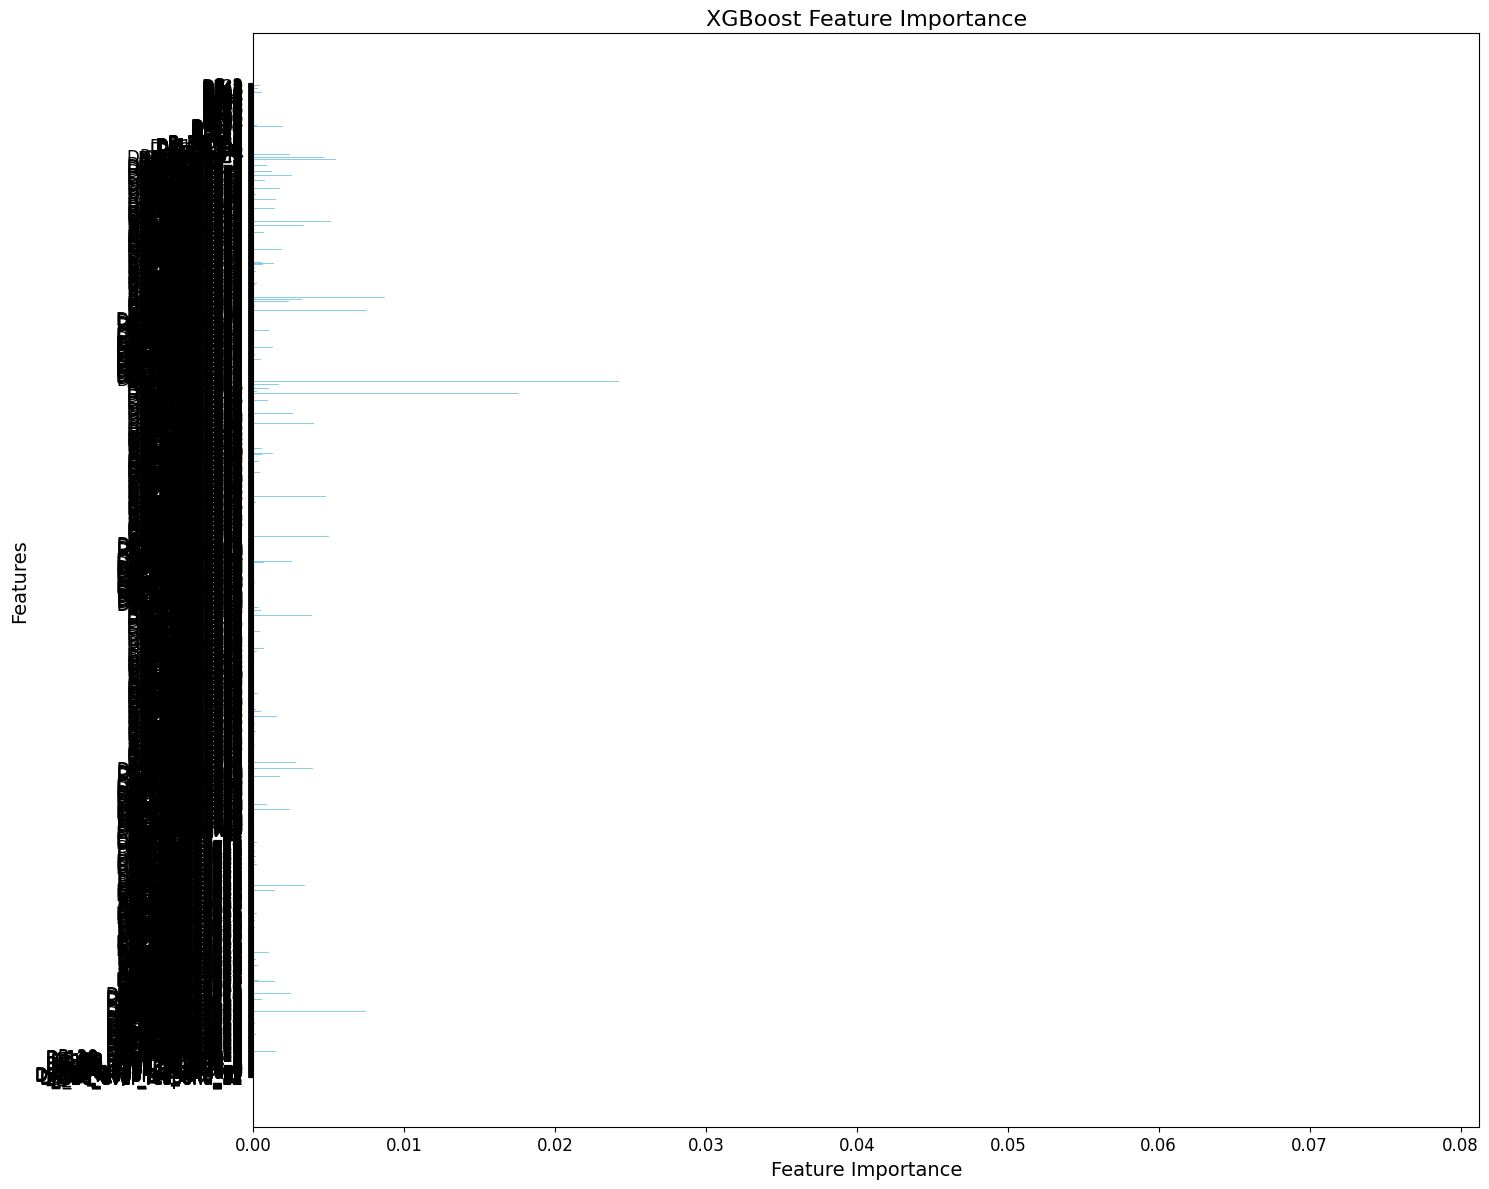

In [36]:
plt.figure(figsize=(15, 12))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('XGBoost Feature Importance', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [38]:
features_df.shape

(3126, 2)

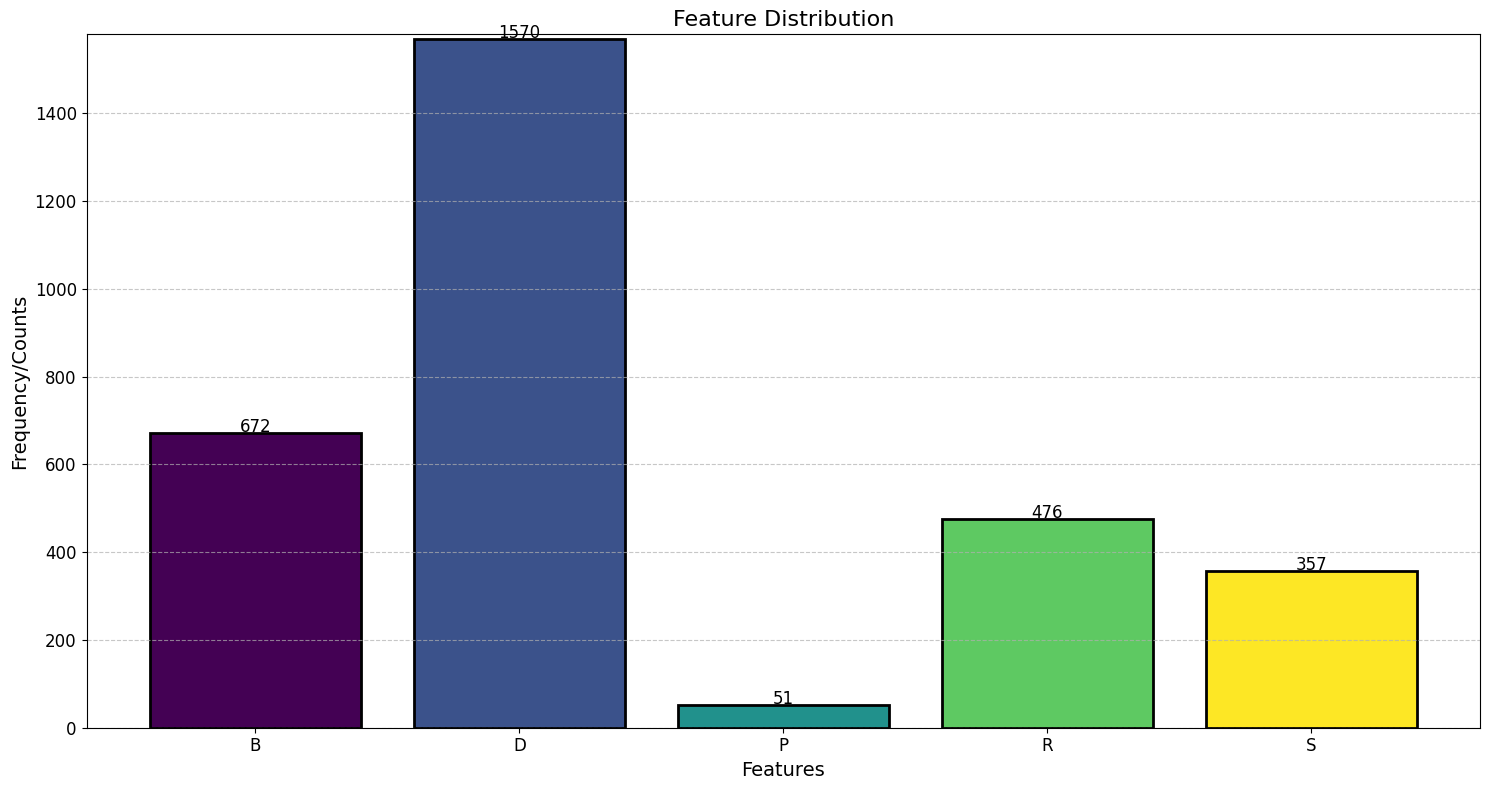

In [37]:
categories = ['B', 'D', 'P', 'R', 'S']
cat_count_values = [len([i for i in X_train.columns if i.startswith("B")]), 
                    len([i for i in X_train.columns if i.startswith("D")]), 
                    len([i for i in X_train.columns if i.startswith("P")]), 
                    len([i for i in X_train.columns if i.startswith("R")]), 
                    len([i for i in X_train.columns if i.startswith("S")])]
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(categories)))
plt.figure(figsize=(15, 8)) 
plt.bar(categories, cat_count_values, color=colors, edgecolor='black', linewidth=2)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Frequency/Counts', fontsize=14)
plt.title('Feature Distribution', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, v in enumerate(cat_count_values):
    plt.text(i, v + 2, str(v), ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max(cat_count_values) + 10)
plt.tight_layout()
plt.show()

In [39]:
from sklearn.utils.class_weight import compute_sample_weight

#weights for the target variable
weights = compute_sample_weight(class_weight={0:1, 1:5}, y=y_train)

# Create an XGBClassifier object
xg_clf2 = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.5,
    max_depth=4,
    subsample=0.5,
    colsample_bytree=0.5,
    use_label_encoder=False
)

# Fit the classifier to the training data
xg_clf2.fit(X_train, y_train, sample_weight=weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

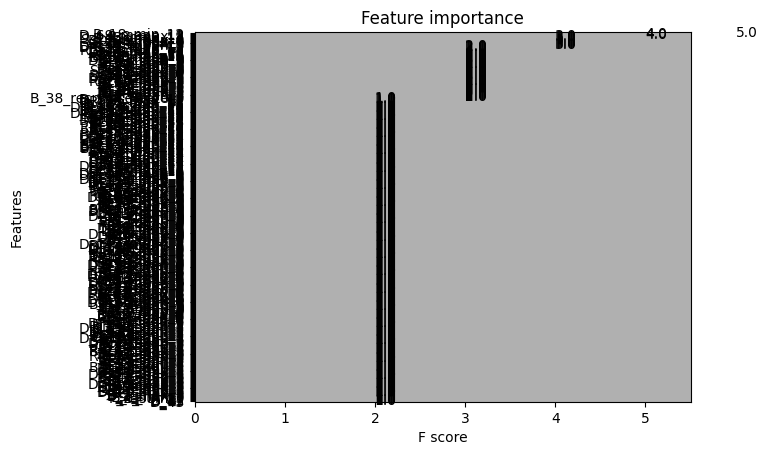

In [40]:
xgb.plot_importance(xg_clf2.fit(X_train, y_train), importance_type='weight')

In [41]:
# feature importance
feature_importances2 = xg_clf2.feature_importances_

features_importances2 = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances2
})

features_importances2.to_csv('feature_importances2.csv', index=False)
print (features_importances2.to_string())

                     Feature  Importance
0                        P_2    0.000000
1                       D_39    0.000000
2                        B_1    0.000000
3                        B_2    0.000000
4                        R_1    0.000000
5                        S_3    0.000730
6                       D_41    0.000000
7                        B_3    0.000000
8                       D_42    0.000000
9                       D_43    0.002586
10                      D_44    0.000000
11                       B_4    0.000000
12                      D_45    0.001226
13                       B_5    0.000000
14                       R_2    0.000000
15                      D_46    0.000000
16                      D_47    0.000000
17                      D_48    0.000000
18                      D_49    0.000000
19                       B_6    0.000000
20                       B_7    0.000000
21                       B_8    0.000000
22                      D_50    0.000000
23              

In [42]:
features_importances2

,Feature,Importance
0,P_2,0.0
1,D_39,0.0
2,B_1,0.0
3,B_2,0.0
4,R_1,0.0
...,...,...
3121,D_117_ever_respond_12,0.0
3122,D_120_ever_respond_12,0.0
3123,D_126_ever_respond_12,0.0
3124,D_66_ever_respond_12,0.0


In [43]:
features_default_model = pd.read_csv('feature_importances.csv')
features_parameters_model = pd.read_csv('feature_importances2.csv')

In [44]:
threshold = 0.5 / 100  

#features that meet the threshold in both models
features_default_model_above_threshold = features_default_model[features_default_model['Importance'] > threshold]['Feature']
features_parameters_model_above_threshold = features_parameters_model[features_parameters_model['Importance'] > threshold]['Feature']

In [45]:
# Combining the features from both models
selected_features_df = pd.concat([features_default_model_above_threshold, features_parameters_model_above_threshold]).drop_duplicates().reset_index(drop=True)

selected_features_df.to_csv('selected_features_df.csv', index=False)

In [47]:
# Filter columns in df2 based on selected features and 'target'
selected_features = selected_features_df.tolist()  # Convert selected_features_df to a list
selected_features.append('target')  # Add 'target' to the list of selected features
df2 = df2[selected_features]  # Select columns from df2 based on selected features

# Display df2 with selected features
df2

,P_2_sum_3,B_2_min_3,R_1_max_3,D_43_sum_3,D_44_max_3,B_5_mean_3,D_48_min_3,D_54_mean_3,D_55_mean_3,D_58_mean_3,...,D_52_sum_12,R_4_sum_12,R_24_sum_12,S_23_mean_12,S_26_sum_12,D_103_min_12,R_27_max_12,D_113_min_12,D_113_sum_12,target
0,1.984007,0.094994,0.009424,0.000000,0.008441,0.025165,0.065276,1.004120,0.104078,0.006051,...,0.818023,0.055967,0.080459,0.135429,0.560306,0.001972,1.010000,0.008324,2.062591,0
1,1.984007,0.094994,0.009424,0.000000,0.008441,0.025165,0.065276,1.004120,0.104078,0.006051,...,0.818023,0.055967,0.080459,0.135429,0.560306,0.001972,1.010000,0.008324,2.062591,0
2,1.984007,0.094994,0.009424,0.000000,0.008441,0.025165,0.065276,1.004120,0.104078,0.006051,...,0.818023,0.055967,0.080459,0.135429,0.560306,0.001972,1.010000,0.008324,2.062591,0
3,1.984007,0.094994,0.009424,0.000000,0.008441,0.025165,0.065276,1.004120,0.104078,0.006051,...,0.818023,0.055967,0.080459,0.135429,0.560306,0.001972,1.010000,0.008324,2.062591,0
4,1.984007,0.094994,0.009424,0.000000,0.008441,0.025165,0.065276,1.004120,0.104078,0.006051,...,0.818023,0.055967,0.080459,0.135429,0.560306,0.001972,1.010000,0.008324,2.062591,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11083,1.742111,0.371904,0.009587,1.205482,0.134800,0.020577,0.530935,1.005671,0.487619,0.450341,...,1.177589,0.051426,0.062667,0.137304,0.032996,1.000594,1.009517,0.601051,11.056783,1
11084,1.742111,0.371904,0.009587,1.205482,0.134800,0.020577,0.530935,1.005671,0.487619,0.450341,...,1.177589,0.051426,0.062667,0.137304,0.032996,1.000594,1.009517,0.601051,11.056783,1
11085,1.742111,0.371904,0.009587,1.205482,0.134800,0.020577,0.530935,1.005671,0.487619,0.450341,...,1.177589,0.051426,0.062667,0.137304,0.032996,1.000594,1.009517,0.601051,11.056783,1
11086,1.742111,0.371904,0.009587,1.205482,0.134800,0.020577,0.530935,1.005671,0.487619,0.450341,...,1.177589,0.051426,0.062667,0.137304,0.032996,1.000594,1.009517,0.601051,11.056783,1


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

In [49]:
X = df2.drop(columns=['target'])
y = df2['target']

In [50]:
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_test1, X_test2, y_test1, y_test2 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)

# grid parameters
param_grid = {
    'n_estimators': [50, 100, 300],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.8],
    'colsample_bytree': [0.5, 1.0],
    'scale_pos_weight': [1, 5, 10]
}

In [51]:
# XGBClassifier object
xg_clf3 = XGBClassifier(use_label_encoder=False)

# GridSearchCV object
grid_search = GridSearchCV(estimator=xg_clf3, param_grid=param_grid, cv=3, scoring='roc_auc')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 1.0],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [50, 100, 300],
                         'scale_pos_weight': [1, 5, 10],
                         'subsample': [0.5, 0.8]},
             scoring='roc_auc')

In [52]:
best_params = grid_search.best_params_
best_params

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'n_estimators': 300,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [53]:
from sklearn.metrics import roc_auc_score

In [54]:
# Create an empty DataFrame
results_df = pd.DataFrame(columns=['# Trees', 'LR', 'Subsample %', 'Features', '% Weight of Default', 'AUC Train', 'AUC Test 1', 'AUC Test 2'])

# Iterate over each combination of settings
for i, params in enumerate(grid_search.cv_results_['params']):
    
    # Fit model with current parameters
    xg_clf3.set_params(**params)
    xg_clf3.fit(X_train, y_train)
    
    # Predict probabilities for each set
    train_pred = xg_clf3.predict_proba(X_train)[:, 1]
    test1_pred = xg_clf3.predict_proba(X_test1)[:, 1]
    test2_pred = xg_clf3.predict_proba(X_test2)[:, 1]
    
    # Calculate AUC for each set
    auc_train = roc_auc_score(y_train, train_pred)
    auc_test1 = roc_auc_score(y_test1, test1_pred)
    auc_test2 = roc_auc_score(y_test2, test2_pred)
    
    # Create a temporary DataFrame
    temp_df = pd.DataFrame({
        '# Trees': params['n_estimators'],
        'LR': params['learning_rate'],
        'Subsample %': [f'{params["subsample"] * 100}%'],
        'Features': [f'{params["colsample_bytree"] * 100}%'],
        '% Weight of Default': [params['scale_pos_weight']],
        'AUC Train': [auc_train],
        'AUC Test 1': [auc_test1],
        'AUC Test 2': [auc_test2]
    })
    
    # Concatenate the temporary DataFrame with the results DataFrame
    results_df = pd.concat([results_df, temp_df], ignore_index=True)

results_df.to_csv('grid_search_XGBoost.csv', index=False)
results_df

/var/folders/mm/_jbxn5915kq9bxwm41rqw0y40000gn/T/ipykernel_5469/4032829440.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, temp_df], ignore_index=True)


,# Trees,LR,Subsample %,Features,% Weight of Default,AUC Train,AUC Test 1,AUC Test 2
0,50,0.01,50.0%,50.0%,1,0.998557,0.997859,0.996748
1,50,0.01,80.0%,50.0%,1,0.998418,0.997904,0.996265
2,50,0.01,50.0%,50.0%,5,0.993155,0.993500,0.986007
3,50,0.01,80.0%,50.0%,5,0.993470,0.993957,0.986501
4,50,0.01,50.0%,50.0%,10,0.990444,0.992978,0.981449
...,...,...,...,...,...,...,...,...
67,300,0.10,80.0%,100.0%,1,1.000000,0.999660,0.999998
68,300,0.10,50.0%,100.0%,5,1.000000,0.999988,0.999994
69,300,0.10,80.0%,100.0%,5,1.000000,0.999791,0.999998
70,300,0.10,50.0%,100.0%,10,1.000000,0.999943,0.999998


In [ ]:
# Find the row with the highest average AUC
best_model_row = results_df.loc[results_df['AUC Test 1'].idxmax()]

best_model_params = {
    'n_estimators': best_model_row['# Trees'],
    'learning_rate': best_model_row['LR'],
    'subsample': float(best_model_row['Subsample %'][:-1]) / 100.0,
    'colsample_bytree': float(best_model_row['Features'][:-1]) / 100.0,
    'scale_pos_weight': best_model_row['% Weight of Default']
}

# Print information about the best model
print("Best Model Parameters:")
print(best_model_row)